# 박스 플롯과 이상점

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data-2/test_school.csv')
df

,english_score,math_score,science_score
0,42.5,82.5,86.0
1,50.0,72.5,70.0
2,62.5,92.5,86.0
3,60.0,77.5,86.0
4,65.0,85.0,86.0
...,...,...,...
295,65.0,32.5,84.0
296,67.5,80.0,80.0
297,65.0,55.0,70.0
298,57.5,65.0,84.0


In [6]:
df.describe()

,english_score,math_score,science_score
count,300.000000,300.000000,300.00000
mean,62.295667,64.763333,78.75000
std,10.528884,14.225454,8.22301
min,27.000000,25.000000,45.00000
25%,57.500000,55.000000,72.37500
50%,62.500000,67.500000,80.00000
75%,70.000000,75.000000,85.00000
max,97.000000,97.500000,96.00000


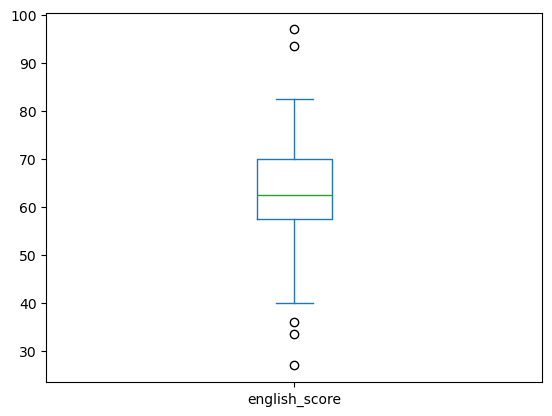

In [7]:
# 영어 점수 박스 플롯
df['english_score'].plot(kind='box')
plt.show()

- 영어 점수 분포
    - iqr
    - 정상범위

In [12]:
q1 = df['english_score'].quantile(0.25)
q3 = df['english_score'].quantile(0.75)
q1, q3
iqr = q3 - q1

In [13]:
lower_whisker_en = q1 - 1.5 * iqr
lower_whisker_en

38.75

In [14]:
upper_whisker_en = q3 + 1.5 * iqr
upper_whisker_en

88.75

- 과학 점수 분포
    - iqr
    - 정상범위

In [15]:
q1 = df['science_score'].quantile(0.25)
q3 = df['science_score'].quantile(0.75)

iqr = q3 - q1

upper_whisker_sci = q3 + 1.5*iqr
lower_whisker_sci = q1 - 1.5*iqr

upper_whisker_sci, lower_whisker_sci

(103.9375, 53.4375)

53.4375

- 이렇듯 이론적 상한 수염(정상 범위)이 최대값보다 커지는 경우,
    - 실제 최대값을 상한 수염(정상 범위)로 한다.
        - 즉, 상한 수염이 103이지만, 실제 최대값 96이 실제 상한 수염이다.

103.9375

### (참고) 박스플롯 종합 분석 (영어, 수학, 과학 점수)

##### 1. **중앙값 비교**

- **과학 점수**의 중앙값이 **80점**으로 가장 높고, **수학**은 **67.5점**, **영어**는 **62.5점**으로 세 과목 중 가장 낮음.  

- 과학 점수의 중앙값이 가장 높아 전반적으로 학생들이 과학에서 더 높은 성과를 나타냄.

##### 2. **사분위 범위 (IQR) 비교**

- **영어 점수**의 IQR(57.5~70)은 상대적으로 **좁은 범위**를 나타냄. 이는 영어 점수가 다른 과목에 비해 덜 분포되어 있으며, 중간 50%의 학생들이 비슷한 점수를 얻었음을 의미함.

- **수학 점수**의 IQR(55~75)은 비교적 넓은 범위를 보이며, 학생들의 점수 분포가 넓고 변동성이 큼을 나타냄. 이는 일부 학생들이 높은 점수를, 일부는 낮은 점수를 기록했음을 의미함.

- **과학 점수**는 IQR(72.375~85)로 중간 정도의 범위를 보이며, 다른 과목에 비해 **안정적**인 분포를 나타냄.

##### 3. **상한/하한 수염의 범위**

- **수학 점수**는 상한과 하한 수염의 범위가 가장 넓어(25점에서 97.5점) 점수 분포가 광범위함. 이는 다양한 수준의 학생들이 수학에서 나타나고 있음을 의미함.

- **영어 점수**는 하한 수염이 38.75점으로, 일부 낮은 점수는 이상치로 처리됨. 반면 상한 수염은 88.75점으로 상위권의 학생들이 고르게 분포되어 있지 않음을 나타냄.

- **과학 점수**는 하한 수염이 약 53.4375점으로 상대적으로 높은 편이며, 전반적으로 고른 분포를 보이고 있음. 다만 하위 일부 이상치가 존재.

##### 4. **이상치 분석**

- **영어 점수**는 하위 이상치가 많고, 2~30점대의 학생들이 몇 명 있음. 이는 `특정 학생들이 영어에서 유난히 낮은 점수`를 받았음을 시사함.

- **수학 점수**는 이상치가 없음. 이는 학생들의 점수가 전반적으로 고르게 분포되어 있음을 나타냄.

- **과학 점수**는 몇 개의 하위 이상치가 존재하며, 4~50점대의 학생들이 이상치로 표시됨.

##### 5. **수학 점수의 분포**

- **수학 점수**는 IQR 범위와 전체 점수 분포가 다른 두 과목에 비해 `매우 넓음.`  
  이는 수학에서 학생들 간의 **점수 차이가 크다**는 것을 의미하며, 학생들의 `실력 차이`가 명확히 나타난다고 볼 수 있음.  
  일부 학생은 높은 점수를 받았지만, 일부는 낮은 점수를 기록하여 학생 간 `성적 격차`가 큼.

##### **최종 분석**

- **영어**는 점수 분포가 좁고, 중간값이 가장 낮으며, 이상치가 많이 발생한 반면,

- **수학**은 중간값이 과학보다 낮지만, IQR과 전체 범위가 넓어 학생들 간 **점수 차이가 크고 변동성**이 큼.  

- **과학**은 중간값이 세 과목 중 가장 높으며, 점수 분포가 안정적이면서도 일부 하위 이상치가 존재함.



결론적으로, 수학 점수는 학생들 간의 점수 차이가 가장 크게 나타나며, 상위권과 하위권 학생들이 고르게 분포된 반면, 영어는 비교적 고르게 분포된 학생들이 많지만 일부 낮은 점수가 눈에 띔. 과학은 중앙값이 가장 높고, 점수 분포가 안정적이면서도 일부 낮은 이상치가 관찰됨.

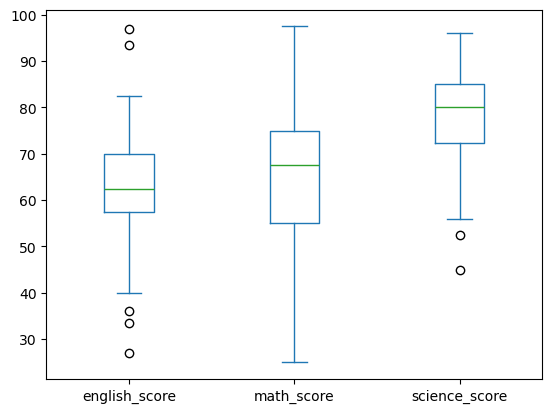

In [16]:
df.plot(kind='box')
plt.show()

##### (틈새 개념) Pandas에서 여러 열 선택 시 `[[ ]]` 사용 이유

1. **단일 열 선택 (1차원)**  
   `df['column_name']`  
   - 한 개의 열을 선택할 때, **Series(1차원)** 객체 반환.

2. **여러 열 선택 (2차원)**  
   `df[['column1', 'column2']]`  
   - 여러 개의 열을 선택할 때, **DataFrame(2차원)** 객체 반환.  
   - 리스트 형태로 열 이름을 지정해야 하므로 대괄호가 두 겹으로 사용됨.
      - 1개의 열을 선택할 때도, [[]]을 사용하면, 2차원 pd.DataFrame 반환값을 얻을 수 있다.

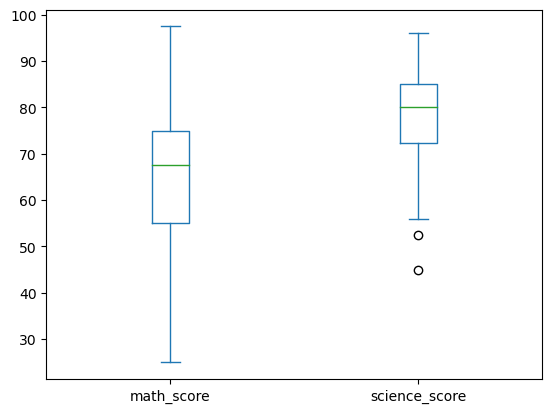